# Data Exploration with Pandas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/titanic-train.csv')

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### Indexing

In [ ]:
df.iloc[3]

In [ ]:
df.loc[0:4,'Ticket']

In [ ]:
df['Ticket'].head()

In [ ]:
df[['Embarked', 'Ticket']].head()

### Selections

In [ ]:
df[df['Age'] > 70]

In [ ]:
df['Age'] > 70

In [ ]:
df.query("Age > 70")

In [ ]:
df[(df['Age'] == 11) & (df['SibSp'] == 5)]

In [ ]:
df[(df.Age == 11) | (df.SibSp == 5)]

In [ ]:
df.query('(Age == 11) | (SibSp == 5)')

### Unique Values

In [ ]:
df['Embarked'].unique()

### Sorting

In [ ]:
df.sort_values('Age', ascending = False).head()

### Aggregations

In [ ]:
df['Survived'].value_counts()

In [ ]:
df['Pclass'].value_counts()

In [ ]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

In [ ]:
df['Age'].min()

In [ ]:
df['Age'].max()

In [ ]:
df['Age'].mean()

In [ ]:
df['Age'].median()

In [ ]:
mean_age_by_survived = df.groupby('Survived')['Age'].mean()
mean_age_by_survived

In [ ]:
std_age_by_survived = df.groupby('Survived')['Age'].std()
std_age_by_survived

### Merge

In [ ]:
df1 = mean_age_by_survived.round(0).reset_index()
df2 = std_age_by_survived.round(0).reset_index()

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3 = pd.merge(df1, df2, on='Survived')

In [ ]:
df3

In [ ]:
df3.columns = ['Survived', 'Average Age', 'Age Standard Deviation']

In [ ]:
df3

### Pivot Tables

In [ ]:
df.pivot_table(index='Pclass',
               columns='Survived',
               values='PassengerId',
               aggfunc='count')

### Correlations

In [ ]:
df['IsFemale'] = df['Sex'] == 'female'

In [ ]:
correlated_with_survived = df.corr()['Survived'].sort_values()
correlated_with_survived

In [ ]:
correlated_with_survived.iloc[:-1].plot(kind='bar',
                                        title='Titanic Passengers: correlation with survival');

# Visual Data Exploration with Matplotlib

In [ ]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [ ]:
data = np.vstack([data1, data2, data3, data4]).transpose()

In [ ]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

### Line Plot

In [ ]:
df.plot(title='Line plot');

In [ ]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4']);

### Scatter Plot

In [ ]:
df.plot(style='.');

In [ ]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

### Histograms

In [ ]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

### Cumulative distribution

In [ ]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        density=True,
        cumulative=True,
        alpha=0.4);

### Box Plot

In [ ]:
df.plot(kind='box',
        title='Boxplot');

### Subplots

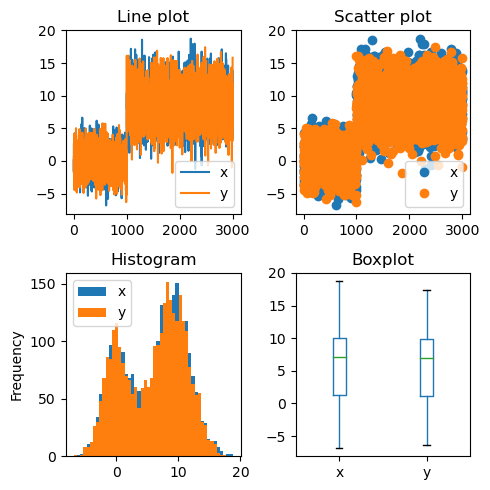

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot')

plt.tight_layout()

### Pie charts

In [ ]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

### Hexbin plot

In [26]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])

In [27]:
df.head()

,x,y
0,-1.413960,0.572459
1,0.234569,-1.645111
2,-1.872785,-0.033203
3,2.707673,2.575827
4,-3.765287,-3.759472


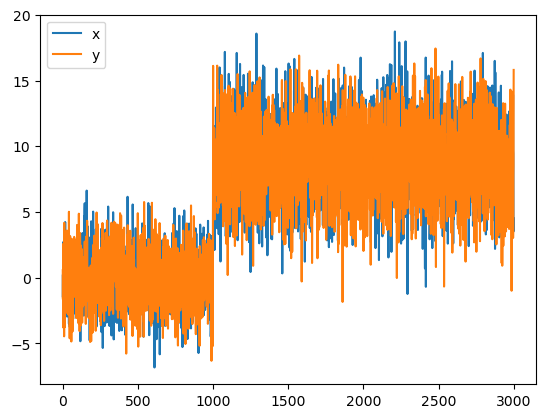

In [28]:
df.plot();

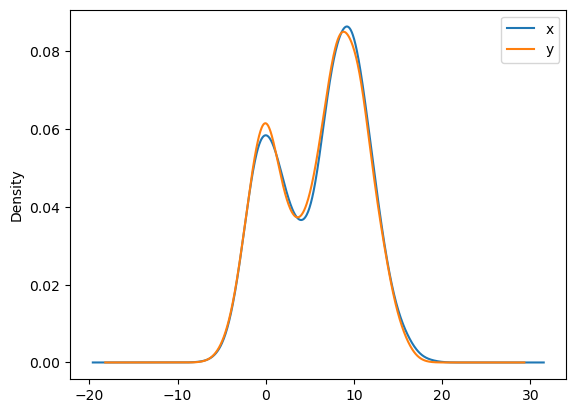

In [29]:
df.plot(kind='kde');

In [ ]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow');

# Unstructured data

### Images

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('../data/iss.jpg')
img

In [ ]:
type(img)

In [ ]:
imgarray = np.asarray(img)

In [ ]:
type(imgarray)

In [ ]:
imgarray.shape

In [ ]:
imgarray.ravel().shape

In [ ]:
435 * 640 * 3

### Sound

In [ ]:
from scipy.io import wavfile

In [ ]:
rate, snd = wavfile.read(filename='../data/sms.wav')

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=snd, rate=rate)

In [ ]:
len(snd)

In [ ]:
snd

In [ ]:
plt.plot(snd)

In [ ]:
_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

# Data Exploration Exercises

## Exercise 1
- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function [`pd.to_datetime()`](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

In [3]:
df1=pd.read_csv('../data/international-airline-passengers.csv')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Thousand Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df1.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df1['Month']=pd.to_datetime(df1['Month'])

In [11]:
df1.set_index('Month', inplace=True)

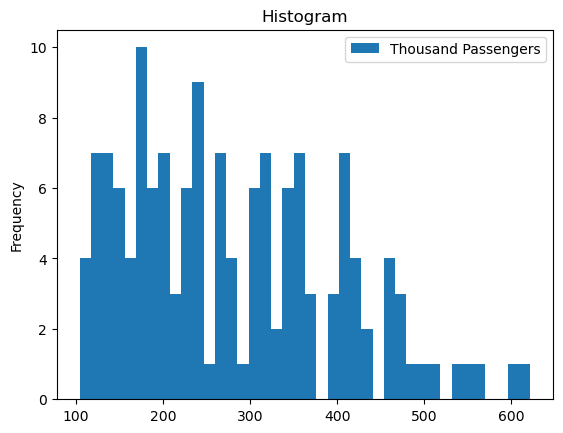

In [15]:
df1.plot(kind='hist',
        bins=40,
        title='Histogram');

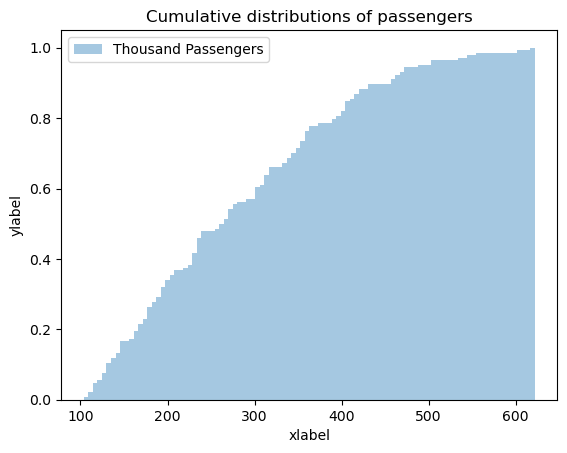

In [25]:
df1.plot(kind='hist',
        bins=100,
        title='Cumulative distributions of passengers',
        density=True,
        cumulative=True,
        alpha=0.4)
plt.xlabel('xlabel')
plt.ylabel('ylabel');

## Exercise 2
- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

In [31]:
df2=pd.read_csv('../data/weight-height.csv')

In [32]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [44]:
df2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [36]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


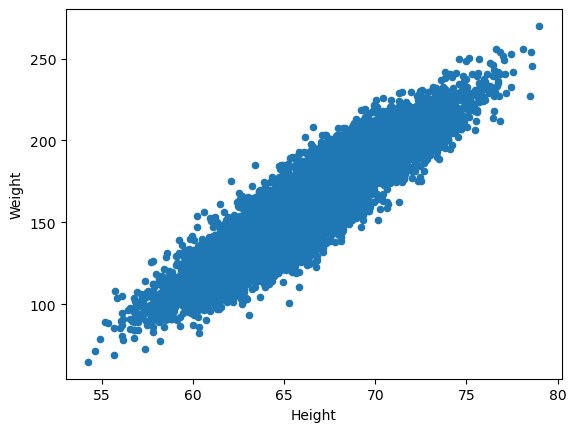

In [48]:
df2.plot(kind='scatter', x='Height', y='Weight');

In [49]:
import matplotlib.pyplot as plt

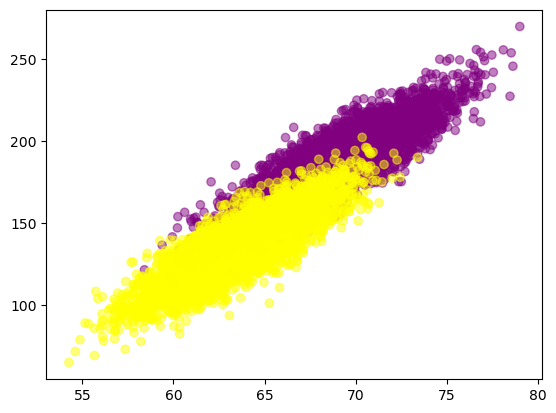

''

In [75]:
fig, ax = plt.subplots()
colours = {'Male':'purple','Female':'yellow'}

ax.scatter(df2['Height'],df2['Weight'],alpha=0.5,c=df2['Gender'].map(colours))
plt.show()
;

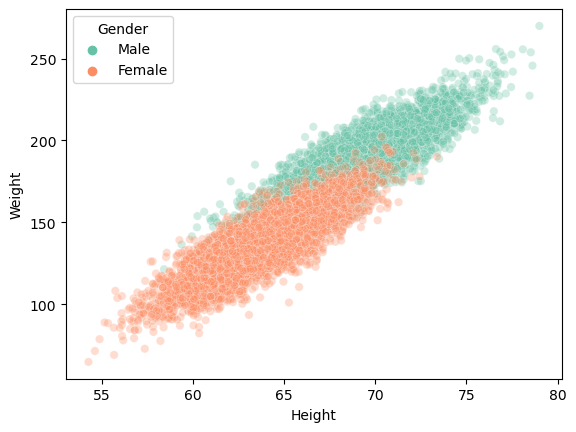

In [82]:
import seaborn as sns
sns.scatterplot(x='Height',y='Weight', data=df2, hue='Gender', palette='Set2', alpha=0.3);

<AxesSubplot:xlabel='Height', ylabel='Weight'>

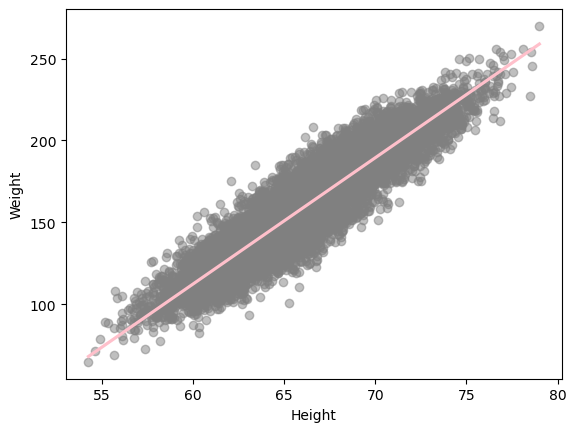

In [90]:
sns.regplot(data=df2, x='Height',y='Weight', scatter_kws = {"color": "grey", "alpha": 0.5},
            line_kws = {"color": "pink"},
            ci = 99)

## Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using `plt.axvline()`

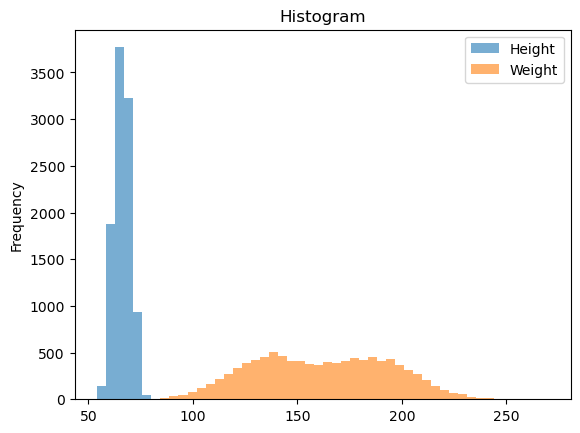

In [91]:
df2.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

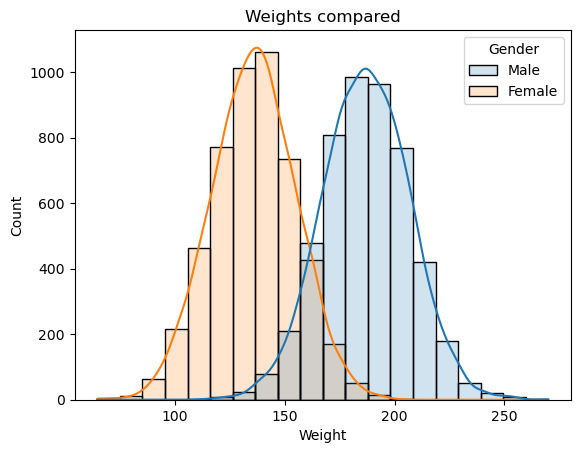

In [114]:
ax=sns.histplot(data=df2, x="Weight", hue="Gender", bins=20, multiple="layer",alpha=0.2,kde=True).set(title='Weights compared')

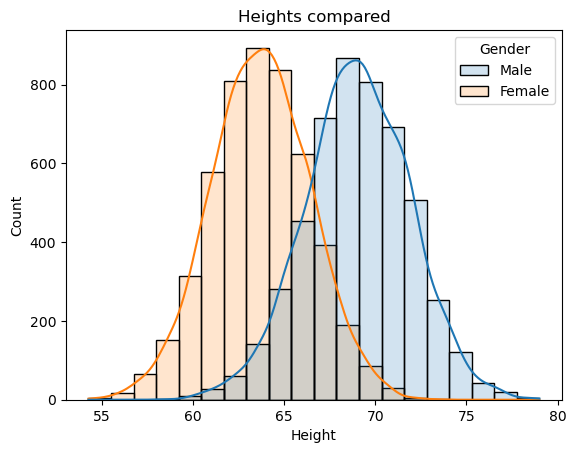

In [115]:
ax=sns.histplot(data=df2, x="Height", hue="Gender", bins=20, multiple="layer",alpha=0.2,kde=True).set(title='Heights compared')

In [132]:
males=df2.query("Gender=='Male'")

In [133]:
females=df2.query("Gender!='Male'")

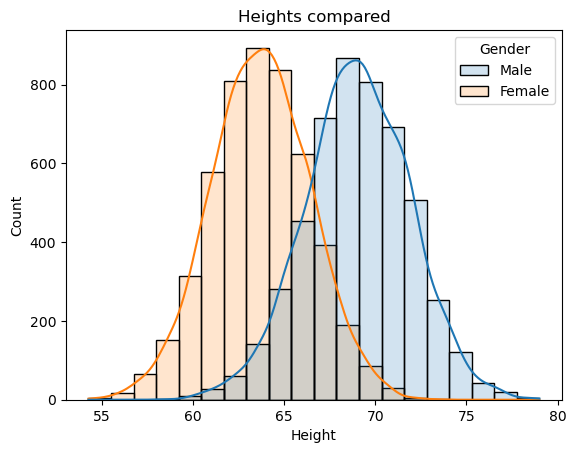

In [130]:
ax=sns.histplot(data=df2, x="Height", hue="Gender", bins=20, multiple="layer",alpha=0.2,kde=True).set(title='Heights compared')

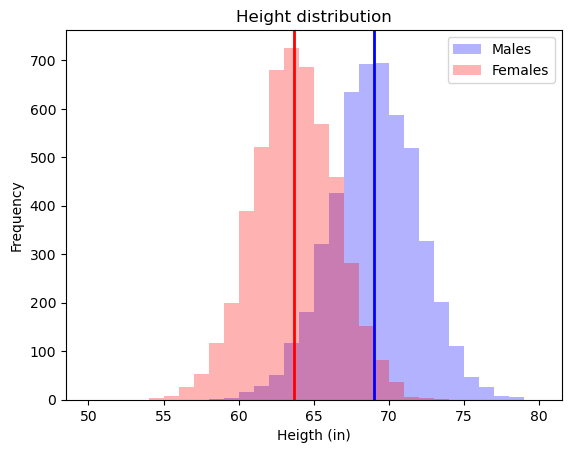

In [136]:
males['Height'].plot(kind='hist',
                     bins=30,
                     range=(50, 80),
                     alpha=0.3,
                     color='blue')

females['Height'].plot(kind='hist',
                       bins=30,
                       range=(50, 80),
                       alpha=0.3,
                       color='red')

plt.title('Height histogram')
plt.legend(["Males", "Females"])
plt.xlabel("Heigth (in)")

plt.axvline(males['Height'].mean(), color='blue', linewidth=2)
plt.axvline(females['Height'].mean(), color='red', linewidth=2);

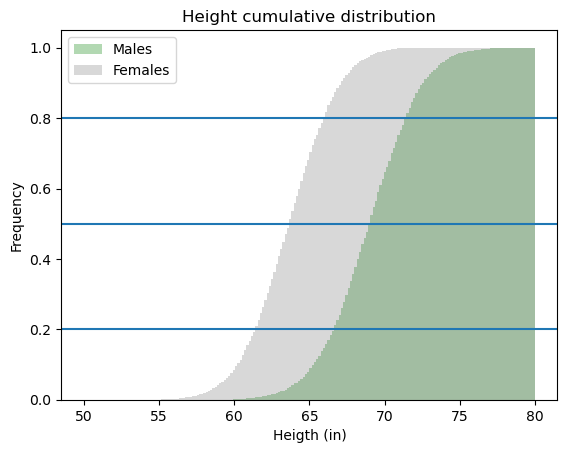

In [140]:
males['Height'].plot(kind='hist',
                     bins=200,
                     range=(50, 80),
                     alpha=0.3,
                     color='green',
                     cumulative=True,
                     density=True)

females['Height'].plot(kind='hist',
                       bins=200,
                       range=(50, 80),
                       alpha=0.3,
                       color='grey',
                       cumulative=True,
                       density=True)

plt.title('Height cumulative distribution')
plt.legend(["Males", "Females"])
plt.xlabel("Heigth (in)")

plt.axhline(0.8)
plt.axhline(0.5)
plt.axhline(0.2);

## Exercise 4
- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

<AxesSubplot:xlabel='Height', ylabel='Gender'>

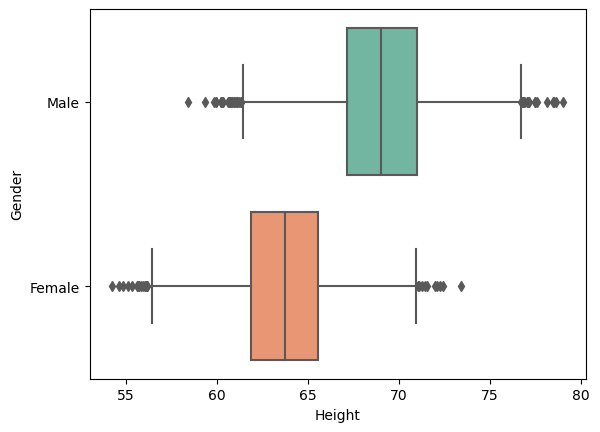

In [144]:
sns.boxplot(data=df2, x="Height", y="Gender", palette='Set2')

<AxesSubplot:xlabel='Weight', ylabel='Gender'>

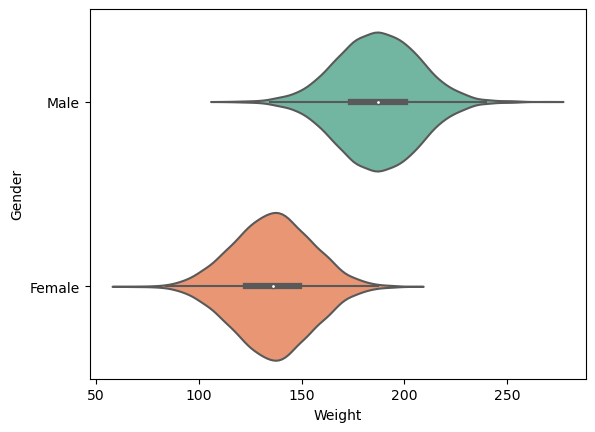

In [145]:
sns.violinplot(data=df2, x="Weight", y="Gender", palette='Set2')

## Exercise 5
- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

In [146]:
df3=pd.read_csv('../data/titanic-train.csv')

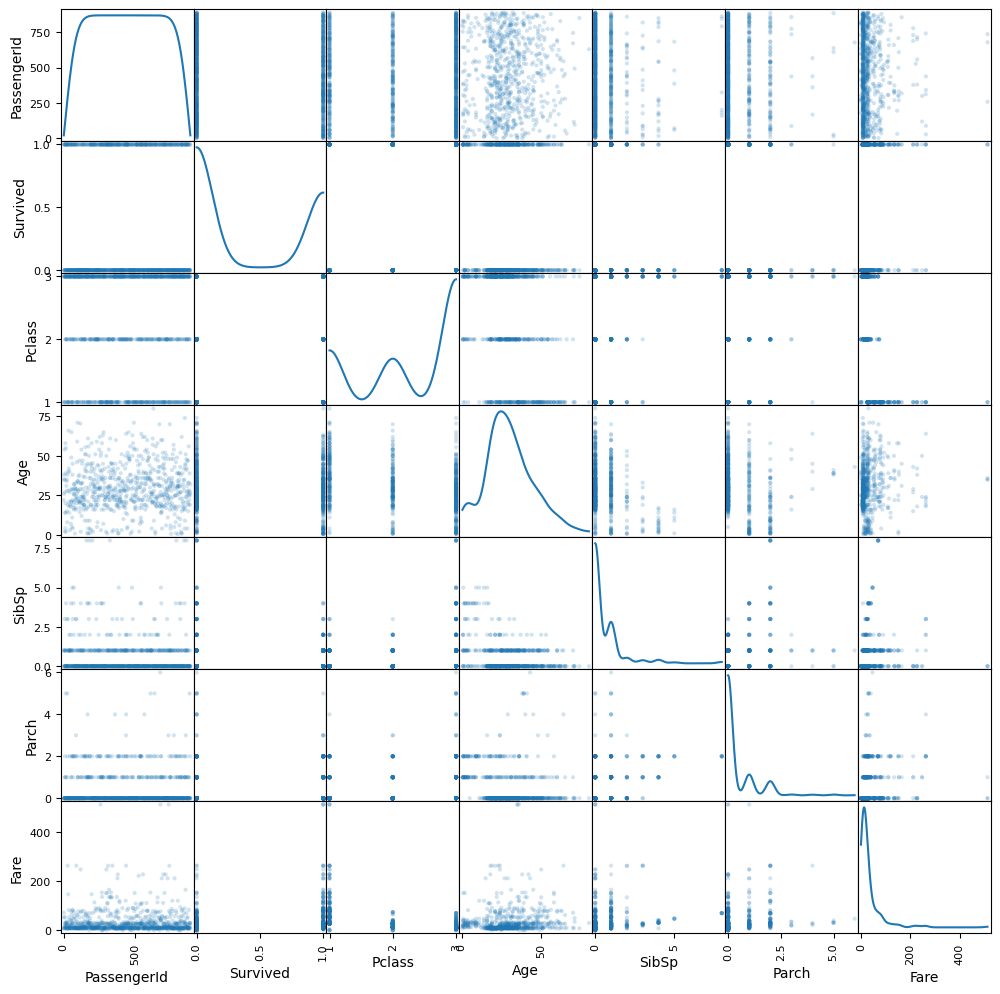

In [150]:
from pandas.plotting import scatter_matrix
scatter_matrix(df3, alpha=0.2, figsize=(12, 12), diagonal="kde");